In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import spotify
import utils

sp = spotify.login(scope='playlist-modify-private')
user = sp.current_user()
username = user['id']
displayName = user['display_name']
displayName

'Mehmet Birgi'

In [2]:
# get all my playlists 
response = sp.current_user_playlists()
all_playlists = response['items']
while response['next']:
    response = sp.next(response)
    all_playlists.extend(response['items'])
len(all_playlists)

105

In [3]:
# save the playlists as a list of dictionaries
import json
import os
folder = 'data'
filename = 'all_my_playlists.json'
if not os.path.exists(folder):
    os.mkdir(folder)
with open(os.path.join(folder, filename), 'w', encoding='utf-8') as f:
    json.dump(all_playlists, f, ensure_ascii=False, indent=4)

In [4]:
# extract all tracks from playlists
playlist_ids = [playlist['id'] for playlist in all_playlists]
all_playlist_tracks = [item['track'] for item in spotify.get_tracks_in_playlists(sp, playlist_ids)]
len(all_playlist_tracks)

39144

In [5]:
# extract the pertinent information
all_tracks = []
for track in all_playlist_tracks:
    name = track['name']
    artists = [{'name': artist['name'], 'id': artist['id']} for artist in track['artists']]
    track_id = track['id']
    duration_ms = track['duration_ms']
    all_tracks.append({
        'name': name,
        'artists': artists,
        'id': track_id,
        'duration_ms': duration_ms
    })
len(all_tracks)

39144

In [6]:
# save the tracks
import json
import os
folder = 'data'
filename = 'all_my_playlist_tracks.json'
if not os.path.exists(folder):
    os.mkdir(folder)
with open(os.path.join(folder, filename), 'w', encoding='utf-8') as f:
    json.dump(all_tracks, f, ensure_ascii=False, indent=4)

In [7]:
# get all 'liked' tracks and add them to the tally
results = sp.current_user_saved_tracks(limit=50)
saved_tracks = results['items']
while results['next']:
    results = sp.next(results)
    saved_tracks.extend(results['items'])
for item in saved_tracks:
    name = item['track']['name']
    artists = [{'name': artist['name'], 'id': artist['id']} for artist in item['track']['artists']]
    track_id = item['track']['id']
    duration_ms = item['track']['duration_ms']
    all_tracks.append({
        'name': name,
        'artists': artists,
        'id': track_id,
        'duration_ms': duration_ms
    })
len(all_tracks)

39307

In [8]:
all_tracks[14458]

{'name': 'Candlelight',
 'artists': [{'name': 'Donald Harrison', 'id': '53pHwg1sjhqGk726JnJHYb'},
  {'name': 'Ron Carter', 'id': '4wnzivx3OQ3vjrySAdTdJP'},
  {'name': 'Billy Cobham', 'id': '0IwfuIL3gUJxjzUqY3wJ3j'}],
 'id': '0YvppvxUQYXPNFF00iYLxz',
 'duration_ms': 393293}

In [9]:
# get saved album tracks and add them to the tally
results = sp.current_user_saved_albums(limit=50)
saved_albums = results['items']
while results['next']:
    results = sp.next(results)
    saved_albums.extend(results['items'])
len(saved_albums)
saved_album_tracks = []
for album in saved_albums:
    results = sp.album_tracks(album['album']['id'])
    album_tracks = results['items']
    while results['next']:
        results = sp.next(results)
        album_tracks.extend(results['items'])
    saved_album_tracks.extend(album_tracks)
album_tracks = []
for track in saved_album_tracks:
    name = track['name']
    artists = [{'name': artist['name'], 'id': artist['id']} for artist in track['artists']]
    track_id = track['id']
    duration_ms = track['duration_ms']
    album_tracks.append({
        'name': name,
        'artists': artists,
        'id': track_id,
        'duration_ms': duration_ms
    })
all_tracks.extend(album_tracks)

In [10]:
len(all_tracks)

49079

In [11]:
# save tracks for later
import json
import os
folder = 'data'
filename = 'all_my_tracks.json'
if not os.path.exists(folder):
    os.mkdir(folder)
with open(os.path.join(folder, filename), 'w', encoding='utf-8') as f:
    json.dump(all_tracks, f, ensure_ascii=False, indent=4)

In [12]:
# read the tracks
import json
import os
folder = 'data'
filename = 'all_my_tracks.json'
with open(os.path.join(folder, filename), 'r', encoding='utf-8') as f:
    all_tracks = json.load(f)

In [13]:
len(all_tracks)

49079

In [14]:
# get audio features
all_track_ids = [track['id'] for track in all_tracks]
audio_features = spotify.get_audio_features_for_tracks(sp, all_track_ids)

In [15]:
audio_features[:2]

[{'danceability': 0.838,
  'energy': 0.764,
  'key': 7,
  'loudness': -5.076,
  'mode': 0,
  'speechiness': 0.0586,
  'acousticness': 0.0862,
  'instrumentalness': 0.000122,
  'liveness': 0.0906,
  'valence': 0.924,
  'tempo': 133.592,
  'type': 'audio_features',
  'id': '023lag1AgeOf7YChojecRu',
  'uri': 'spotify:track:023lag1AgeOf7YChojecRu',
  'track_href': 'https://api.spotify.com/v1/tracks/023lag1AgeOf7YChojecRu',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/023lag1AgeOf7YChojecRu',
  'duration_ms': 161240,
  'time_signature': 4},
 {'danceability': 0.79,
  'energy': 0.614,
  'key': 11,
  'loudness': -15.281,
  'mode': 1,
  'speechiness': 0.0942,
  'acousticness': 0.174,
  'instrumentalness': 0.497,
  'liveness': 0.155,
  'valence': 0.387,
  'tempo': 111.01,
  'type': 'audio_features',
  'id': '33eZMP1iybo3VBrJJeMwob',
  'uri': 'spotify:track:33eZMP1iybo3VBrJJeMwob',
  'track_href': 'https://api.spotify.com/v1/tracks/33eZMP1iybo3VBrJJeMwob',
  'analysis_url': 'https

In [16]:
len(audio_features)

49079

In [17]:
# save tracks for later
import json
import os
folder = 'data'
filename = 'all_my_tracks_audio_features.json'
if not os.path.exists(folder):
    os.mkdir(folder)
with open(os.path.join(folder, filename), 'w', encoding='utf-8') as f:
    json.dump(audio_features, f, ensure_ascii=False, indent=4)

In [18]:
len(audio_features)

49079

In [19]:
list(audio_features[0].keys())

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [22]:
# check for invalid records
audio_features = [track for track in audio_features if track is not None]
len(audio_features)

49073

In [23]:
df_audio_features = pd.DataFrame(audio_features).drop(columns=['type', 'uri', 'track_href', 'analysis_url'])

In [24]:
df_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.838,0.764,7,-5.076,0,0.0586,0.0862,0.000122,0.0906,0.9240,133.592,023lag1AgeOf7YChojecRu,161240,4
1,0.790,0.614,11,-15.281,1,0.0942,0.1740,0.497000,0.1550,0.3870,111.010,33eZMP1iybo3VBrJJeMwob,367567,4
2,0.909,0.407,6,-8.258,0,0.0669,0.1850,0.000000,0.0757,0.5080,109.983,6N3KdEz4JPwHp6kfMdy1i9,187704,4
3,0.212,0.376,1,-34.734,1,0.0523,0.9660,0.645000,0.1100,0.0686,74.809,42o4C7nCvWDzZlwzojupL9,122328,3
4,0.579,0.661,0,-7.775,0,0.0357,0.0190,0.002160,0.1030,0.2050,134.036,2Qg0jbBO58hytXlhpaSeeB,173880,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49068,0.474,0.575,5,-9.952,1,0.0980,0.1750,0.000000,0.1880,0.7730,184.832,5EPJ4Vg1AkcOcLi0c6xWMG,239640,4
49069,0.749,0.439,9,-14.898,1,0.0289,0.6490,0.113000,0.0875,0.5750,123.203,4mpnyBVLtkRpvDVodedXeQ,222107,4
49070,0.487,0.138,0,-10.839,1,0.0379,0.7490,0.000028,0.1060,0.2330,121.062,1mkLqKwhZYU9z7CZQSaxW3,214000,4
49071,0.688,0.886,2,-11.154,1,0.0607,0.2820,0.002290,0.1620,0.5980,136.482,6FUMP0fyzWqhA3O64ap4o4,196933,4


##### select the suitable tracks:

In [40]:
tempo_min, tempo_max = 135, 140
track_ids = set(df_audio_features[
    (df_audio_features['tempo'] >= tempo_min) & 
    (df_audio_features['tempo'] <= tempo_max) & 
    (df_audio_features['danceability'] >= 0.8) &
    (df_audio_features['liveness'] <= 0.4) &
    (df_audio_features['speechiness'] <= 0.33)
]['id'])
len(track_ids)

129

In [41]:
playlist_id, is_new = spotify.get_playlist_by_name(sp, 
        f"BPM {tempo_min} - {tempo_max} All Tracks", 
        create_if_none=True)
if playlist_id and is_new:
    print(f"Created new playlist with ID {playlist_id}")
elif playlist_id:
    print(f"Found existing playlist with ID {playlist_id}")
else:
    print("Something went wrong :-(")

Created new playlist with ID 17EMIHwiUWgULJUBlqBCU6


In [42]:
spotify.add_tracks(sp, playlist_id, track_ids)

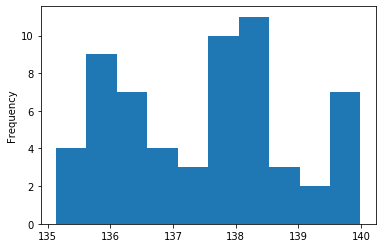

In [63]:
max_ids = 50
tracks_audio_features = []
track_ids = list(track_ids)
for i in range(0, len(track_ids), max_ids):
    results = sp.audio_features(track_ids[i:i+max_ids])
    tracks_audio_features.extend(results)
len(tracks_audio_features)
df_audio_features = pd.DataFrame(tracks_audio_features)
df_audio_features['tempo'].plot.hist()